In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
train_set = pd.read_csv('train_data.csv')
test_set = pd.read_csv('test_data.csv')
train_set.drop(['Unnamed: 0', 'zipcode', 'from', 'positin1', 'undergra', 'income', 'mn_sat', 'tuition', 'id', 'iid'], inplace=True, axis=1)
test_set.drop(['Unnamed: 0', 'zipcode', 'from', 'positin1', 'undergra', 'income', 'mn_sat', 'tuition', 'id', 'iid'], inplace=True, axis=1)
X_train = train_set.drop(['match'], axis=1)
columns = X_train.columns
y_train = train_set['match']
X_test = test_set.drop(['match'], axis=1)
y_test = test_set['match']

In [3]:
#Standarization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # NOT FIT TRANSFORM
print(np.std(X_train))
print(abs(round(np.mean(X_train), 17)))

0.9999999999999999
1e-17


In [10]:
#Before removing dec
log_reg = LogisticRegression()

scores = cross_val_score(log_reg, X_train, y_train, cv=5, n_jobs=-1, scoring='f1')

print(scores)
print(scores.mean())
print(scores.std())

[1. 1. 1. 1. 1.]
1.0
0.0


In [161]:
importances = log_reg.fit(X_train, y_train).coef_
imp_df = pd.DataFrame({'Feature': columns, 'Coefficient': importances.flatten()})
imp_df.sort_values(ascending = False, by = 'Coefficient', inplace = True)
print(imp_df)

     Feature  Coefficient
19     dec_o     4.980671
85       dec     4.932351
86      attr     0.152839
20    attr_o     0.135967
140  sinc5_2     0.091390
..       ...          ...
67    amb4_1    -0.061204
90       amb    -0.061579
105   fun3_s    -0.084525
2     condtn    -0.087471
127  shar4_2    -0.088011

[183 rows x 2 columns]


In [11]:
train_set.drop(['dec', 'dec_o'], inplace=True, axis=1)
test_set.drop(['dec', 'dec_o'], inplace=True, axis=1)



In [12]:
X_train = train_set.drop(['match'], axis=1)
X_test = test_set.drop(['match'], axis=1)
columns = X_train.columns

In [13]:
#First attempt
log_reg = LogisticRegression()

scores = cross_val_score(log_reg, X_train, y_train, cv=5, n_jobs=-1, scoring='f1')

print(scores)
print(scores.mean())
print(scores.std())

[0.47288503 0.34332989 0.36426117 0.43672457 0.2992126 ]
0.3832826502701967
0.06310378591247302


In [169]:
importances = log_reg.fit(X_train, y_train).coef_
imp_df = pd.DataFrame({'Feature': columns, 'Coefficient': importances.flatten()})
imp_df.sort_values(ascending = False, by = 'Coefficient', inplace = True)

In [171]:
imp_df

,Feature,Coefficient
9,int_corr,0.379655
90,like,0.354235
25,like_o,0.314818
146,num_in_3,0.305976
19,attr_o,0.269968
...,...,...
134,intel3_2,-0.157824
10,samerace,-0.178568
177,sinc5_3,-0.182714
103,fun3_s,-0.193990


In [14]:
#Hyperparameter tuning
param_grid = {"C":[0.001, 0.01, 0.1, 0.5, 1.0, 10.0, 20.0, 50.0], "penalty": ["l1", "l2"], "solver": ["liblinear"]}
#param_grid = {"C":[0.1, 0.5, 1.0, 10.0, 20.0, 50.0], "penalty": ["l2"], "solver": ["liblinear"]}
log_reg_clf = LogisticRegression()


grid_search = GridSearchCV(log_reg_clf, param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)

cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(mean_score, params)
    

0.0 {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
0.3594082305926723 {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
0.3862069585607384 {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
0.39076293516522675 {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.41655241245002095 {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.3878046854741757 {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.40773740145990195 {'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}
0.39130076249194 {'C': 0.5, 'penalty': 'l2', 'solver': 'liblinear'}
0.4037180782016795 {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.38590461704495216 {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.394931111899003 {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.3797578514163858 {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.39598751627061274 {'C': 20.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.37823581714140464 {'C': 20.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.3943284631458489 {'C

In [15]:
#Hyperparameter tuning - version with balanced classes
param_grid = {"C":[0.001, 0.01, 0.1, 0.5, 1.0, 10.0, 20.0, 50.0], "penalty": ["l1", "l2"], "solver": ["liblinear"], "class_weight":['balanced']}
#param_grid = {"C":[0.1, 0.5, 1.0, 10.0, 20.0, 50.0], "penalty": ["l2"], "solver": ["liblinear"]}
log_reg_clf = LogisticRegression()


grid_search = GridSearchCV(log_reg_clf, param_grid, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train)

cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(mean_score, params)

KeyboardInterrupt: 

In [123]:
#Only most correlated features
target = 'match'
corr_with_target = train_set.corr(method='spearman')[target]
top_corr = corr_with_target.drop(target).abs().sort_values(ascending=False).head(50)

train_set = pd.read_csv('train_data.csv')
test_set = pd.read_csv('test_data.csv')
train_set.drop(['Unnamed: 0', 'zipcode', 'from', 'positin1', 'undergra', 'income', 'mn_sat', 'tuition', 'id', 'iid', 'dec', 'dec_o'], inplace=True, axis=1)
test_set.drop(['Unnamed: 0', 'zipcode', 'from', 'positin1', 'undergra', 'income', 'mn_sat', 'tuition', 'id', 'iid', 'dec', 'dec_o'], inplace=True, axis=1)
X_train = train_set.drop(['match'], axis=1)
X_train = X_train[np.array(top_corr.index)]
columns = X_train.columns
y_train = train_set['match']
X_test = test_set.drop(['match'], axis=1)
X_test = X_test[np.array(top_corr.index)]
y_test = test_set['match']
#Standarization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test) # NOT FIT TRANSFORM
print(np.std(X_train))
print(abs(round(np.mean(X_train), 17)))



1.0
1e-17


In [85]:
log_reg = LogisticRegression(penalty="l1", C=0.01, class_weight="balanced", solver="liblinear")
scores = cross_val_score(log_reg, X_train, y_train , cv=5, n_jobs=-1, scoring='f1')
print(scores)
print(scores.mean())
print(scores.std())

[0.39325843 0.42201835 0.45977011 0.4295302  0.50420168]
0.441755754509445
0.0377227543965429


In [96]:
log_reg = LogisticRegression(penalty="l1", C=0.01, class_weight="balanced", solver="liblinear")
log_reg.fit(X_test, y_test)
y_pred = log_reg.predict(X_test)
classification_report = classification_report(y_test, y_pred)
print(classification_report)


              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1105
           1       0.43      0.80      0.56       242

    accuracy                           0.77      1347
   macro avg       0.69      0.78      0.70      1347
weighted avg       0.85      0.77      0.79      1347



In [124]:
log_reg = LogisticRegression(penalty="l1", C=0.01, class_weight="balanced", solver="liblinear")
log_reg.fit(X_test, y_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.58).astype(int)
classification_report_ = classification_report(y_test, y_pred)
print(classification_report_)


              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1105
           1       0.43      0.54      0.48       242

    accuracy                           0.79      1347
   macro avg       0.66      0.69      0.67      1347
weighted avg       0.81      0.79      0.80      1347



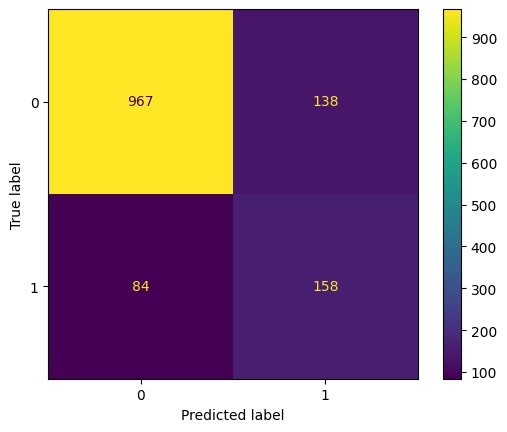

In [119]:
plot = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plot.figure_.savefig('ConfusionMatrix2.png', bbox_inches='tight')

In [120]:
importances = log_reg.fit(X_train, y_train).coef_
imp_df = pd.DataFrame({'Feature': columns, 'Coefficient': importances.flatten()})
imp_df.sort_values(ascending = False, by = 'Coefficient', inplace = True)
print(imp_df)
imp_df.to_csv('logistic_regression_importances.csv', index = False)

      Feature  Coefficient
0        like     0.485069
1      like_o     0.416771
6        attr     0.272658
7      attr_o     0.269559
9      prob_o     0.229797
..        ...          ...
174    fun5_2     0.000000
60    attr3_1    -0.002847
138  shopping    -0.005189
26     condtn    -0.007301
40     amb4_1    -0.037483

[181 rows x 2 columns]


In [78]:
log_reg = LogisticRegression(penalty="l1", C=0.01, class_weight="balanced", solver="liblinear")
importances = log_reg.fit(X_train, y_train).coef_
imp_df = pd.DataFrame({'Feature': columns, 'Coefficient': importances.flatten()})
imp_df.sort_values(ascending = False, by = 'Coefficient', inplace = True)
print(imp_df)

      Feature  Coefficient
0        like     0.484469
1      like_o     0.415477
6        attr     0.271280
7      attr_o     0.269019
9      prob_o     0.228730
..        ...          ...
145   sinc2_1     0.000000
60    attr3_1    -0.002992
138  shopping    -0.003061
26     condtn    -0.007274
40     amb4_1    -0.034388

[150 rows x 2 columns]


0.30459408432976715


C:\Users\olab0\OneDrive\Pulpit\Pulpit_\Studies\Informatyka\Eksploracja danych\projekt\EDP1EDA\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


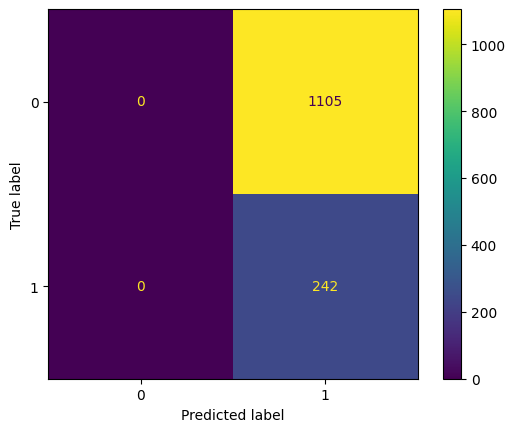

In [83]:
log_reg = LogisticRegression(penalty="l1", C=0.01, class_weight="balanced", solver="liblinear")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
score = f1_score (y_test, y_pred)
print(score)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)